<a href="https://colab.research.google.com/github/GoZaZombie/CTIP-Assignment-2/blob/main/NaiveBayesTrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


#import datasets
EmailSpamData = pd.read_csv(r'../DataSets/emails.csv', encoding='latin-1')
SMSSpamData = pd.read_csv(r'../DataSets/spam.csv', encoding='latin-1')
SMSSpamData2 = pd.read_csv(r'../DataSets/FilteredSpamData.csv',  encoding='latin-1')

#Normalizing the column name scheme
SMSSpamData = SMSSpamData.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
SMSSpamData = SMSSpamData.rename(columns={'v1': 'Classification', 'v2': 'Message'})
SMSSpamData2 = SMSSpamData2.rename(columns={'label': 'Classification', 'text': 'Message'})
SMSSpamData2 = SMSSpamData2.drop(['URL', 'EMAIL', 'PHONE', 'lang','Unnamed: 6', 'Unnamed: 7' , 'Unnamed: 8' , 'Unnamed: 9' , 'Unnamed: 10'], axis=1)
EmailSpamData = EmailSpamData.rename(columns={'text': 'Message','spam': 'Classification'})


#reorder Columns    
            #EmailDataSet
EmailSpamData1 = EmailSpamData[['Message', 'Classification']]
            #SMSData
SMSSpamData = SMSSpamData[['Message', 'Classification']]
SMSSpamData2 = SMSSpamData2[['Message', 'Classification']]

#normalize values for spam and "ham" and makes them 0 for ham and 1 for spam
SMSSpamData.loc[SMSSpamData['Classification'] == 'spam', 'Classification'] = 1
SMSSpamData.loc[SMSSpamData['Classification'] == 'ham', 'Classification'] = 0
SMSSpamData2.loc[SMSSpamData2['Classification'] == 'spam', 'Classification'] = 1
SMSSpamData2.loc[SMSSpamData2['Classification'] == 'ham', 'Classification'] = 0
EmailSpamData.loc[EmailSpamData['Classification'] == 'spam', 'Classification'] = 1
EmailSpamData.loc[EmailSpamData['Classification'] == 'ham', 'Classification'] = 0



vectorizer = TfidfVectorizer() 
vectorizer2 = TfidfVectorizer(
    ngram_range=(1,2), 
    lowercase=True,
    stop_words='english',
    min_df=3,
    max_df=0.9
)
#vectorizer = CountVectorizer() #testing different vectorizers



#combines the two SMS data sets 
SMSSpamDataCombined = pd.concat([SMSSpamData, SMSSpamData2], ignore_index = True)
# Ensure all 'Classification' values are 0 or 1
SMSSpamDataCombined['Classification'] = SMSSpamDataCombined['Classification'].replace({'spam': 1, 'ham': 0, 'Spam': 1, 'Ham': 0})
Y = SMSSpamDataCombined['Classification'].astype(int) #seperates the data into x and y. x being the messages and y being the classification.
X = vectorizer.fit_transform(SMSSpamDataCombined['Message'])
X_TrainData, X_TestData, Y_TrainData, Y_TestData = train_test_split(X, Y , test_size=0.2, random_state =42) #splits the data into training and testing sets, currently 80 - 20 split
# Initialize and train Naive Bayes model for SMS
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_TrainData, Y_TrainData)




# Evaluate the model
Y_PredData = naive_bayes_model.predict(X_TestData)
#EMAIL Model 
B = EmailSpamData['Classification'] = EmailSpamData['Classification'].replace({'spam': 1, 'ham': 0, 'Spam': 1, 'Ham': 0})
A = vectorizer2.fit_transform(EmailSpamData['Message'])
A_TrainData, A_TestData, B_TrainData, B_TestData = train_test_split(A, B , test_size=0.2, random_state =42)

naive_bayes_modelEmail = MultinomialNB()
naive_bayes_modelEmail.fit(A_TrainData, B_TrainData)

B_PredData = naive_bayes_modelEmail.predict(A_TestData)


C:\Users\User\AppData\Local\Temp\ipykernel_46344\1586641447.py:57: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  SMSSpamDataCombined['Classification'] = SMSSpamDataCombined['Classification'].replace({'spam': 1, 'ham': 0, 'Spam': 1, 'Ham': 0})


In [77]:
print(f"SMS Model:")
print("\nConfusion Matrix:") #TP FP FN TN
print(confusion_matrix(Y_TestData, Y_PredData))

print("\nClassification Report:")
print(classification_report(Y_TestData, Y_PredData))


SMS Model:

Confusion Matrix:
[[1912    0]
 [  40  333]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1912
           1       1.00      0.89      0.94       373

    accuracy                           0.98      2285
   macro avg       0.99      0.95      0.97      2285
weighted avg       0.98      0.98      0.98      2285



In [78]:
print(f"Email Model: ")
print("\nConfusion Matrix:") #TP FP FN TN
print(confusion_matrix(B_TestData, B_PredData))

print("\nClassification Report:")
print(classification_report(B_TestData, B_PredData))

Email Model: 

Confusion Matrix:
[[856   0]
 [ 73 217]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       856
           1       1.00      0.75      0.86       290

    accuracy                           0.94      1146
   macro avg       0.96      0.87      0.91      1146
weighted avg       0.94      0.94      0.93      1146



In [79]:
joblib.dump(naive_bayes_model, "NaiveBayesModel.pkl")
joblib.dump(vectorizer, "NaiveBayesVectorizer.pkl")

joblib.dump(naive_bayes_modelEmail, "NaiveBayesModelEmail.pkl")
joblib.dump(vectorizer2, "NaiveBayesVectorizer2.pkl")

['NaiveBayesVectorizer2.pkl']

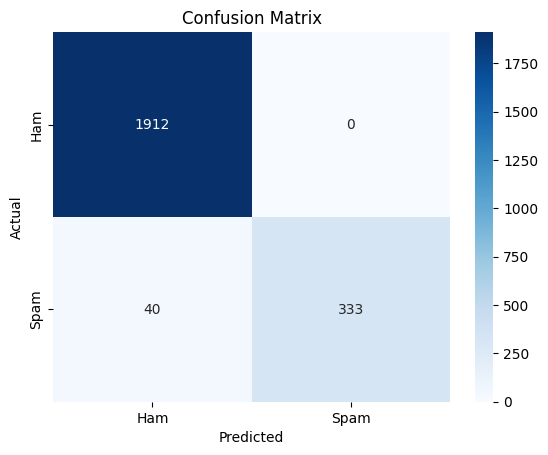

Classification
0    9565
1    1857
Name: count, dtype: int64


In [80]:
cm = confusion_matrix(Y_TestData, Y_PredData)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


print(SMSSpamDataCombined['Classification'].value_counts())


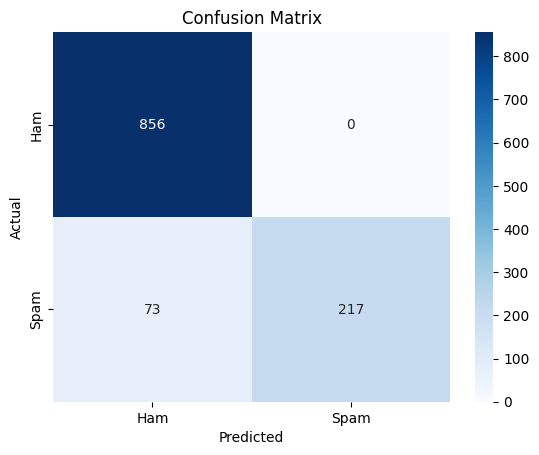

Classification
0    4360
1    1368
Name: count, dtype: int64


In [82]:
cm = confusion_matrix(B_TestData, B_PredData)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


print(EmailSpamData['Classification'].value_counts())